<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/Neural_Network_Classification_with_TensorFlow_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What we're going to cover

* Architecture of neural network classification model
* Input shapes and output shapes of a classification model (features and labels)
* Creating custom data to view and fit
* Steps in modelling -> `Creating a model, compiling a model, fitting a model, evaluating a model`
* Different classification evaluation methods
* Saving and Loading models

### Let's Cook

Tensor -> [batch_size, width, height, color_channels] = [None/32, 224, 224, 3] (Shape of the tensor)

[A Recipe for Training Neural Network](https://karpathy.github.io/2019/04/25/recipe/) - Andrej Karpathy

## Introduction to neural network classification with TensorFlow

In this notebook we're going to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check the labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "label": y})
circles.head(), circles.shape

(          x         y  label
 0  0.754246  0.231481      1
 1 -0.756159  0.153259      1
 2 -0.815392  0.173282      1
 3 -0.393731  0.692883      1
 4  0.442208 -0.896723      0,
 (1000, 3))

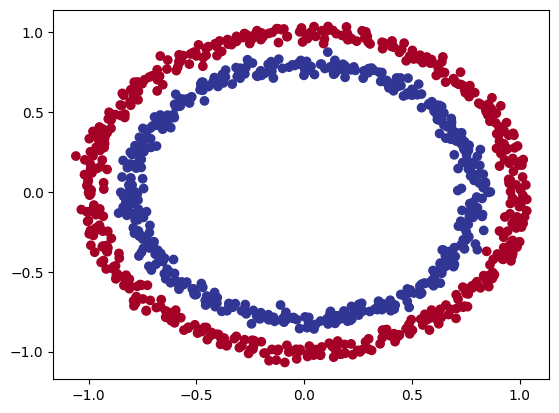

In [ ]:
# Visualize with plot
import matplotlib.pyplot as plt

plt.scatter(circles["x"], circles["y"], c=circles["label"], cmap=plt.cm.RdYlBu)

📑**Resources:** [Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.35340&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### Input and Output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples are we working with?
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[42], y[42]

(array([-0.71424251, -0.67921777]), 0)

### Steps in modelling

1. Get the data ready
2. Build or pick a pretrained model (to suit your problem).
3. Fit the model to the data and make a prediction.
4. Evaluate the model
5. Improve through experimentation.

In [ ]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the mdoel using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

# 4. Evaluate the model
model_1.evaluate(X, y)

Epoch 1/5
32/32 [==============================] - 3s 3ms/step - loss: 5.6619 - accuracy: 0.4520
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we're working on a classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we can add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we can choose different optimization function such as adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

### Common ways to improve a deep learning model

- Adding Layers
- Increase the no. of hidden units.
- Change the activation functions.
- Change the optimization function.
- Change the learning rate.
- Fitting on more data.
- Fitting for longer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # Adding 100 neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 mroe neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5060


[0.6999878883361816, 0.5059999823570251]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑**Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, Let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid (numPy) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


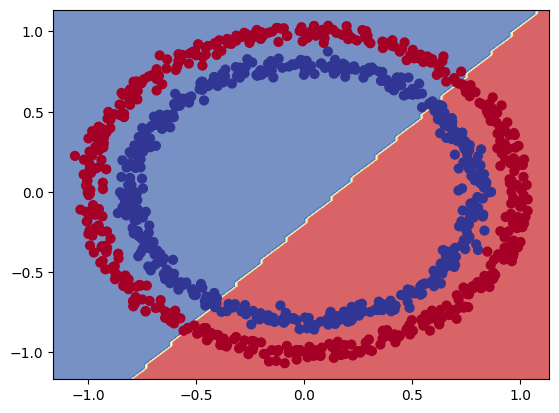

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# ERROR!

# # Let's see if our model can be used for a regression problem...
# tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# # Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=1)

# # Evaluate our model on the test set
# model_3.evaluate(X_reg_test, y_reg_test)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=1)

# Evaluate the model
model_4.evaluate(X_reg_test, y_reg_test)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 490.3317 - mae: 490.3317
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 392.1149 - mae: 392.1149
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 298.7038 - mae: 298.7038
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 202.5198 - mae: 202.5198
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 102.5088 - mae: 102.5088
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 51.7029 - mae: 51.7029
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 75.3260 - mae: 75.3260
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 63.3490 - mae: 63.3490
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8783 - mae: 44.8783
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 48.8716 - mae: 48.8716
Epoch 11/100
5/5 [==============================]

[62.90095520019531, 62.90095520019531]

2/2 [==============================] - 0s 4ms/step


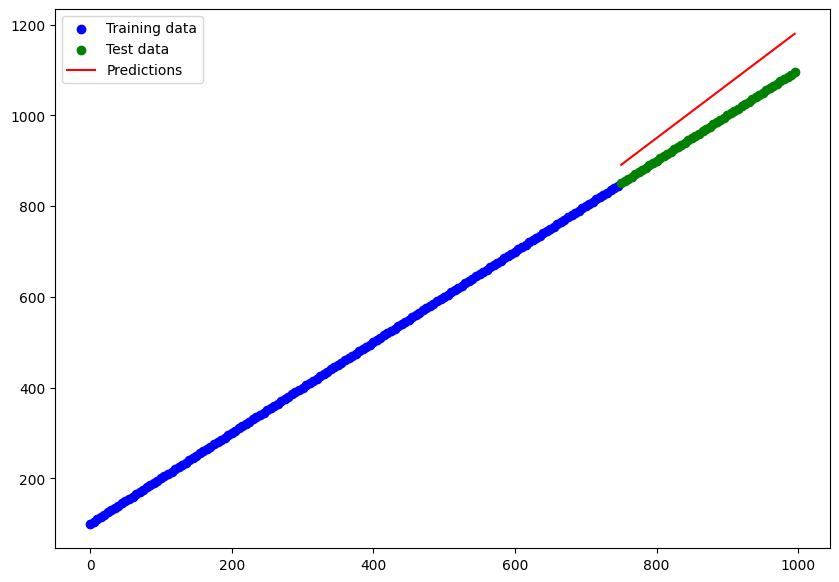

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, color='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.plot(X_reg_test, y_reg_preds, color='r', label='Predictions')
plt.legend();

### The missing piece: Non-linearity

### Let's try to build our first neural network with a non-linear activation function.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 3. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 4. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.6974 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5020
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5010
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5180
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5370
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5440
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5360
Epoch 11/

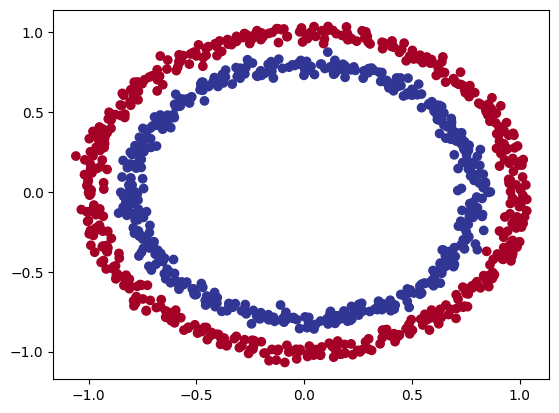

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


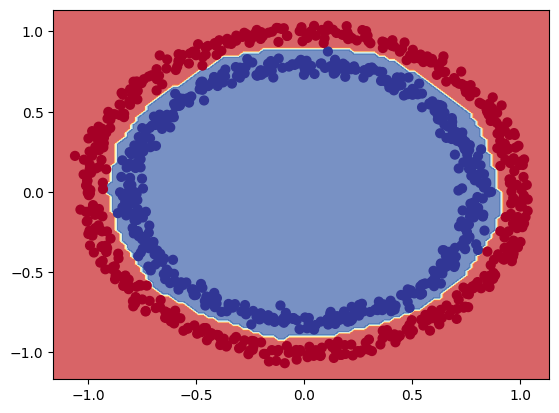

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5, X=X, y=y)

In [ ]:
# 4. Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 1.0000


[0.013593759387731552, 1.0]

🤔**Question:** What's wrong with predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn and what data did we predict on?


🔑**Note:** The combination of ***linear (straight lines) and non-linear (non-straight lines) functions*** is one of the key fundamentals of neural networks.


Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (Similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

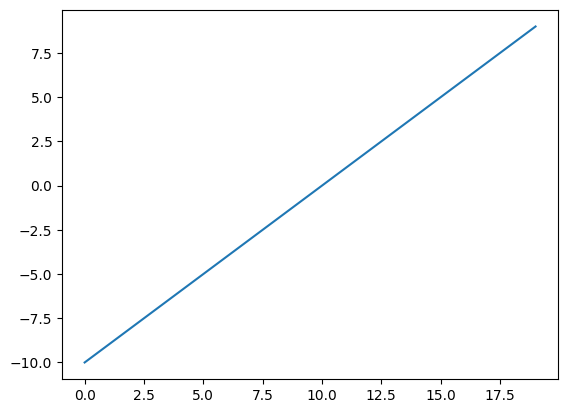

In [ ]:
# Visualize our toy tensor
plt.plot(A)
plt.show()

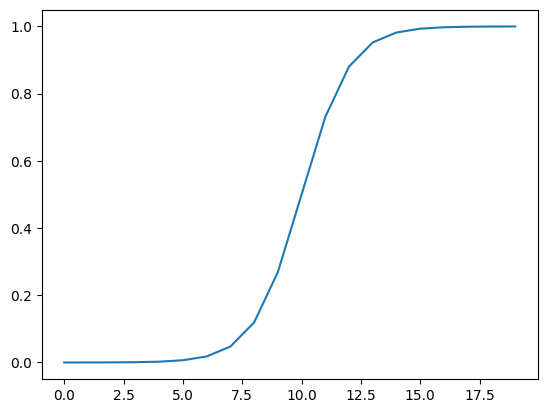

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Visualize sigmoid
plt.plot(sigmoid(A))
plt.show()

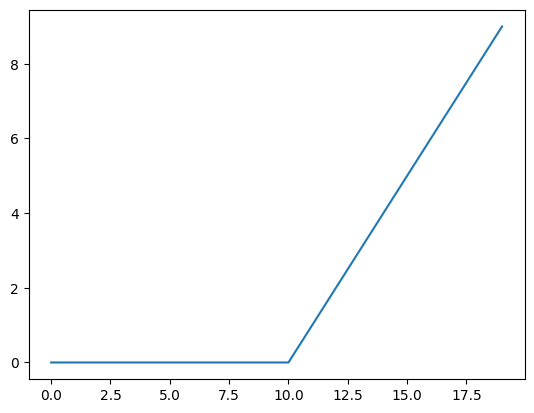

In [ ]:
# Let's recreate reLU function
def reLU(x):
  return tf.maximum(x, 0)

# Visualize reLU
plt.plot(reLU(A))
plt.show()

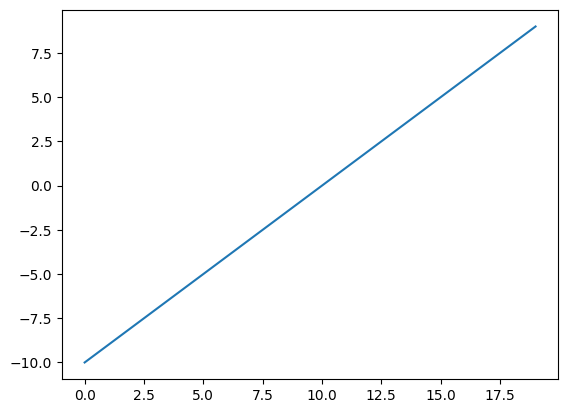

In [ ]:
# Let's try the linear activation function
plt.plot(tf.keras.activations.linear(A));  # Visualize linear -> output unchanged => inp = out

### Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, In ML this is basically a sin.

So let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# Spli into train and test
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Check the shapes of our data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the test set

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_5)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 3. Compile the model (same as model_5)
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 4. Fit the model (same as model_5)
history = model_6.fit(X_train, y_train, epochs=75, verbose=1)

Epoch 1/75
25/25 [==============================] - 1s 3ms/step - loss: 0.6869 - accuracy: 0.5688
Epoch 2/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6712
Epoch 3/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.7362
Epoch 4/75
25/25 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.9175
Epoch 5/75
25/25 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.9762
Epoch 6/75
25/25 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9950
Epoch 7/75
25/25 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9987
Epoch 8/75
25/25 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9987
Epoch 9/75
25/25 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9987
Epoch 10/75
25/25 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 11/75
25/25 [

In [ ]:
# Evaluate the model on the test dataset
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9950


[0.009142274968326092, 0.9950000047683716]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


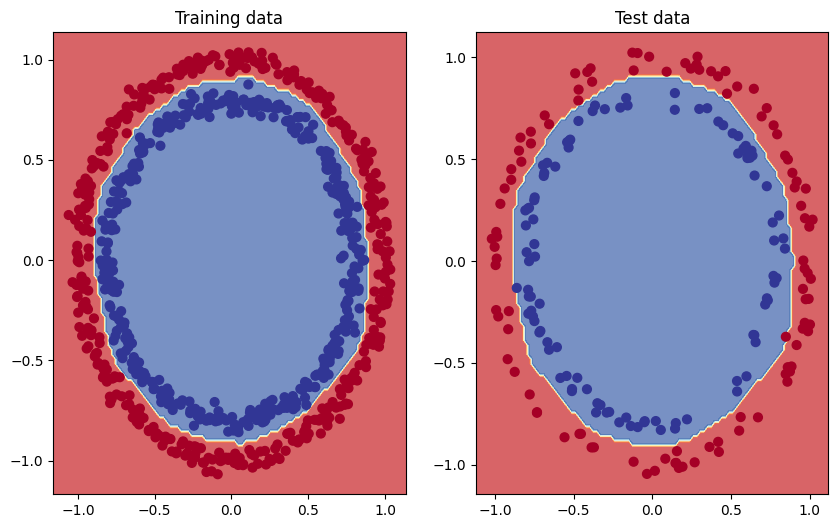

In [ ]:
# Plot the decision boundary for the training and testing sets
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Training data')
plot_decision_boundary(model=model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test data')
plot_decision_boundary(model=model_6, X=X_test, y=y_test)

### Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.686934,0.56875
1,0.662652,0.67125
2,0.605616,0.73625
3,0.474646,0.91750
4,0.309819,0.97625
...,...,...
70,0.002199,1.00000
71,0.000823,1.00000
72,0.000547,1.00000
73,0.000510,1.00000


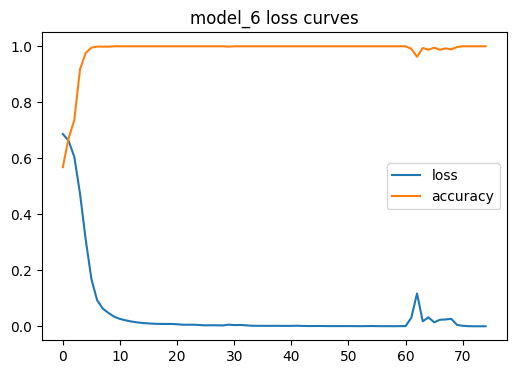

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.title('model_6 loss curves');

🔑**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can add to your *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as the above)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_7 = model_7.fit(X_train, y_train, epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

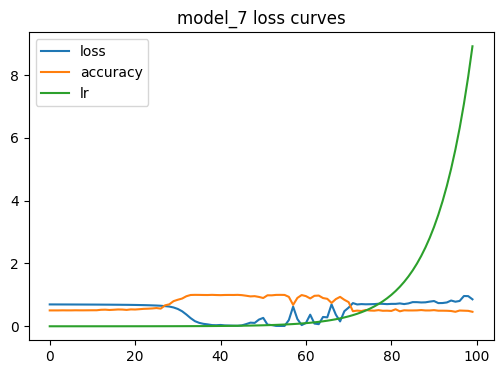

In [ ]:
# Checkout the history
pd.DataFrame(history_7.history).plot(figsize=(6, 4))
plt.title('model_7 loss curves');

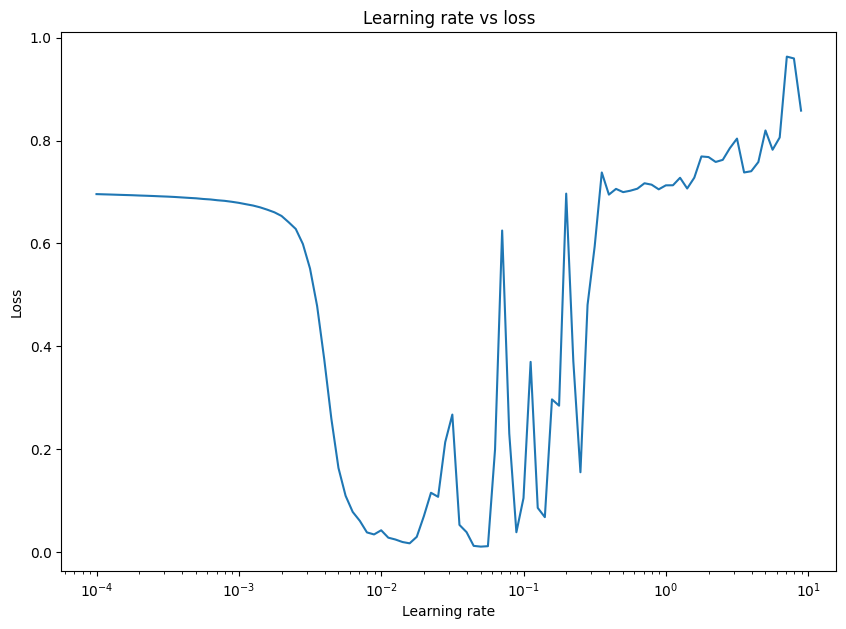

In [ ]:
# Plot the learning_rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_7.history["loss"])
plt.title("Learning rate vs loss");
plt.xlabel("Learning rate");
plt.ylabel("Loss");

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

# Set the random seed
tf.random.set_seed(42)

# Create a model (same as the above)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with ideal learning rate
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # learning_rate used before -> 0.01
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.5500
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6137
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.8763
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.9588
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9925
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9925
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9962
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9987
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9937
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9987
Epoch 11/50
25/25 [

In [ ]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000


[0.0030097276903688908, 1.0]

In [ ]:
# Evaluate model_7 on the test dataset
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934639811515808, 0.4950000047683716]

In [ ]:
# Evaluate model_6 on the test dataset
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9950


[0.009142274968326092, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


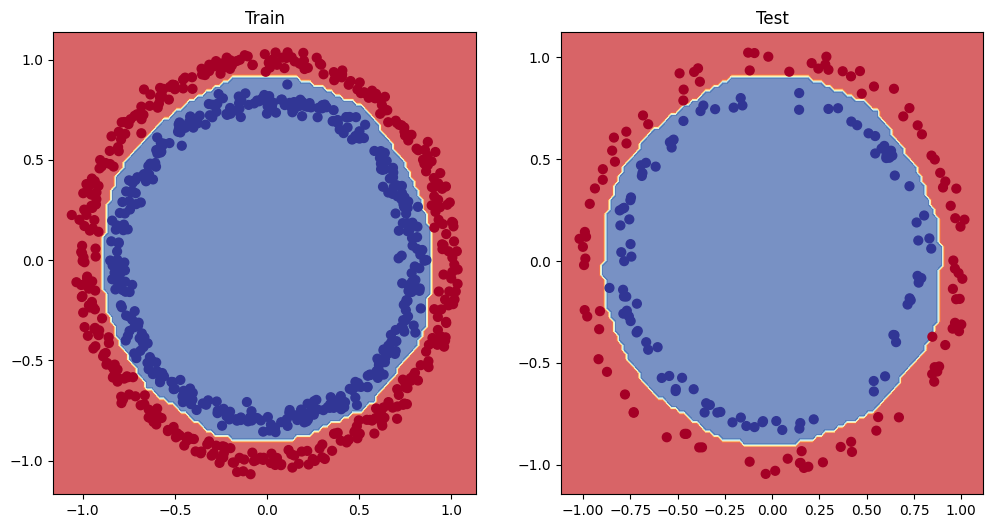

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_8, X=X_test, y=y_test);

### More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.3f}")
print(f'Loss on the test set: {loss:.3f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Accuracy on the test set: 1.000
Loss on the test set: 0.003


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_8.predict(X_test)

# Get the predicted labels
y_preds_labels = [1 if y_pred > 0.5 else 0 for y_pred in y_preds]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds_labels)

7/7 [==============================] - 0s 2ms/step


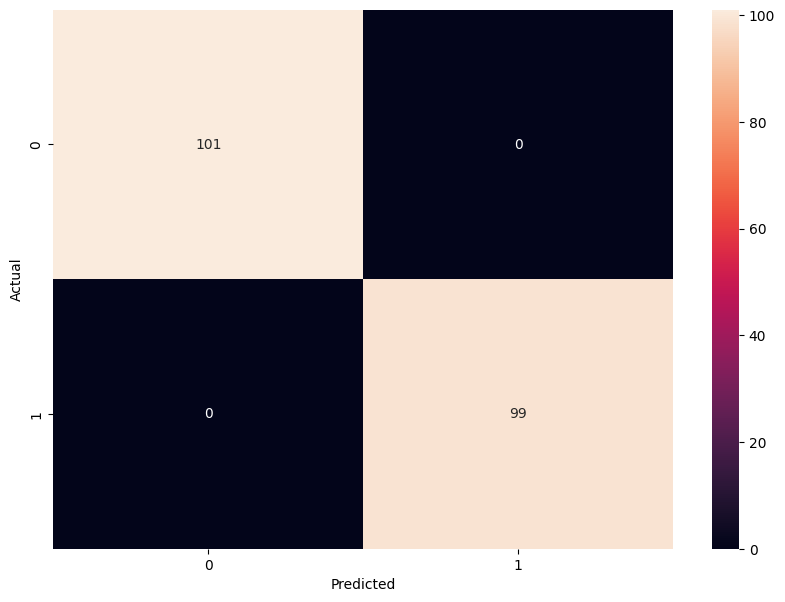

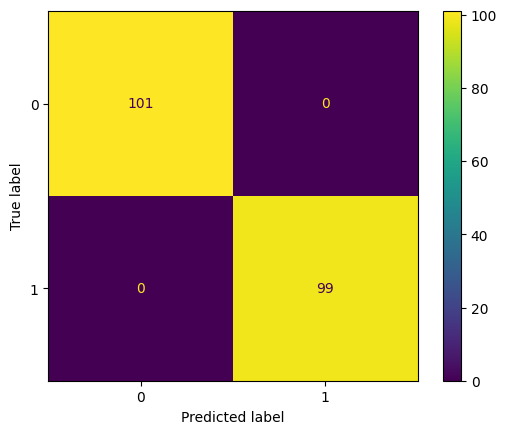

In [ ]:
# Method 1
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

# Method 2
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

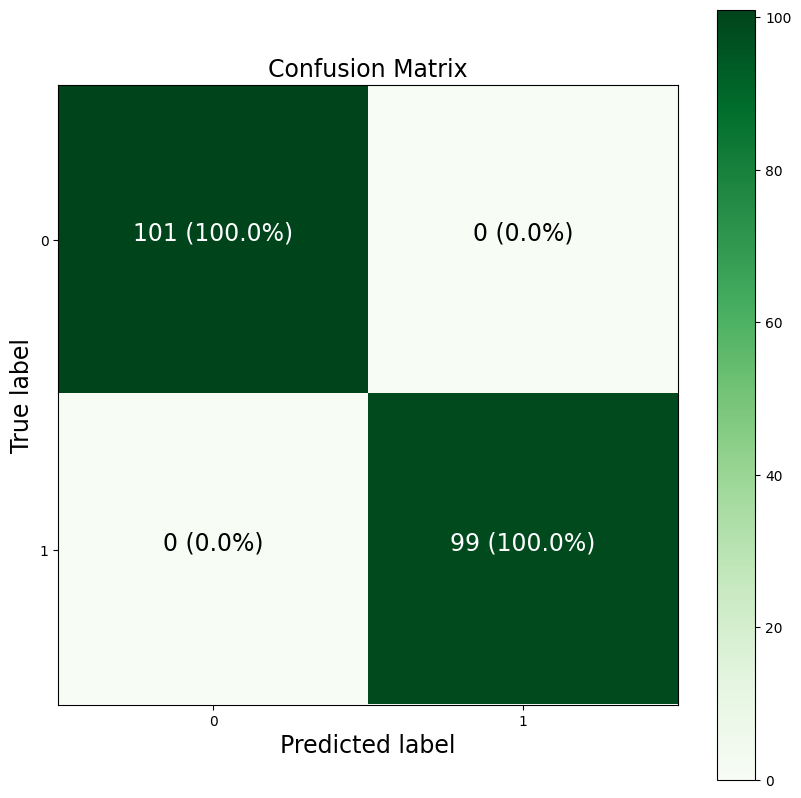

In [ ]:
# Method 3 (more detailed)

# Let's functionize it
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=17):
  '''
  Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values will be used.

  Args:
    ground_truth (np.ndarray): Array of labels of shape (N,)
    predictions (np.ndarray): Array of predictions of shape (N,)
    classes (np.ndarray): Array of class labels of size (C,)
    figsize (tuple): Size of output figure (default=(10, 10))
    text_size (int): Size of output figure text (default=15)

  Returns:
    A labelled confusion matrix plot

  Example usage:
    plot_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15), # size of output figure (optional)
                          text_size=10) # size of output figure text
  '''
  import itertools

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Let's prettify the plot
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Greens) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
         xlabel='Predicted label', ylabel='True label',
         xticks=np.arange(n_classes), yticks=np.arange(n_classes), # create enough axis slots for each class
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=text_size)

plot_confusion_matrix(y_test, y_preds_labels)

### Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multiclass classification**.

* This means if you have 3 differ classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practive multi-class classification, we're going to build a neural network to classify images of differ items of clothing.
[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the training example
print(f'Training data: {train_data[0]}\n')
print(f'Training labels: {train_labels[0]}\n')

Training data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [ ]:
# Check the shape of a single example
print(f'Shape of a single training example: {train_data[0].shape}')
print(f'Shape of a single test example: {test_data[0].shape}')

Shape of a single training example: (28, 28)
Shape of a single test example: (28, 28)


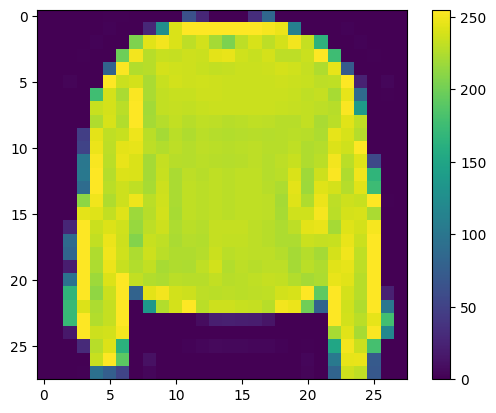

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

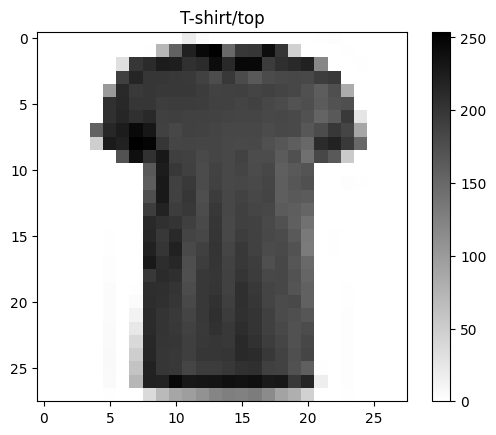

In [ ]:
# Plot an example image and it's label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])
plt.colorbar()
plt.grid(False)
plt.show()

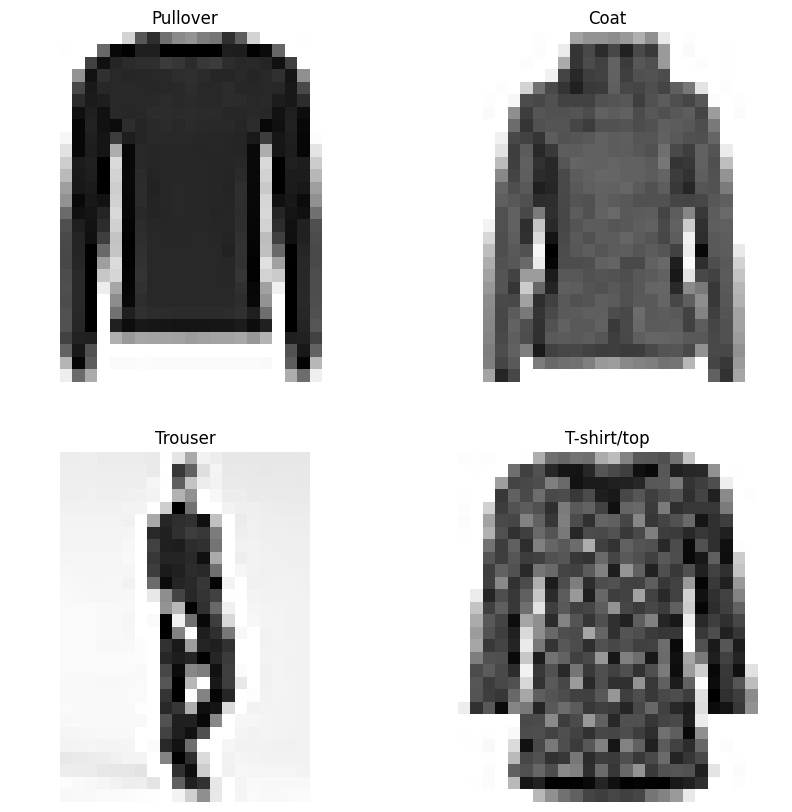

In [ ]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    ax = plt.subplot(2, 2, i+1)
    random_index = random.randint(0, len(train_data))
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False)

### Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = (28, 28) (shape of one image).
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossEntropy()
 * If your labels are one-hot encoded, use CategoricalCrossEntropy()
 * If your labels are integer form use SparseCategoricalCrossEntropy()
*Output layer activation = Softmax (not Sigmoid)

In [ ]:
# our data needs to be flattened (from 28 x 28 to None x 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
non_norm_history = model_9.fit(train_data, train_labels, epochs=10,
                               validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2962 - accuracy: 0.3162 - val_loss: 1.6408 - val_accuracy: 0.3908
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5901 - accuracy: 0.3922 - val_loss: 1.5191 - val_accuracy: 0.4088
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3467 - accuracy: 0.4740 - val_loss: 1.1428 - val_accuracy: 0.5412
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8978 - accuracy: 0.6714 - val_loss: 0.7812 - val_accuracy: 0.7060
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7494 - accuracy: 0.7108 - val_loss: 0.7192 - val_accuracy: 0.7135
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6906 - accuracy: 0.7311 - val_loss: 0.7390 - val_accuracy: 0.7160
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6577 - accuracy: 0.7519 - val_loss: 0.6924 - val_accuracy:

In [ ]:
# Check the model Summary
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 16)                12560     
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers between 0 and 1.

In [ ]:
# We can get our training and testing data b/w 0 & 1 by dividing by the mazimum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the training data
train_data_norm.min(), train_data_norm.max(), len(train_data_norm), len(test_data_norm)

(0.0, 1.0, 60000, 10000)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
norm_history = model_10.fit(train_data_norm, train_labels, epochs=10,
                               validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6144 - accuracy: 0.7898 - val_loss: 0.4745 - val_accuracy: 0.8315
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4354 - accuracy: 0.8464 - val_loss: 0.4973 - val_accuracy: 0.8297
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4062 - accuracy: 0.8562 - val_loss: 0.4511 - val_accuracy: 0.8337
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3858 - accuracy: 0.8632 - val_loss: 0.4119 - val_accuracy: 0.8542
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3738 - accuracy: 0.8665 - val_loss: 0.4343 - val_accuracy: 0.8437
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3634 - accuracy: 0.8699 - val_loss: 0.4196 - val_accuracy: 0.8481
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3564 - accuracy: 0.8728 - val_loss: 0.4200 - val_accuracy:

🔑**Note:** Neural Networks tend to prefer data in numerical form as well as scaled/normalized (numbers b/w 0 & 1).

<Axes: title={'center': 'Normalized data'}>

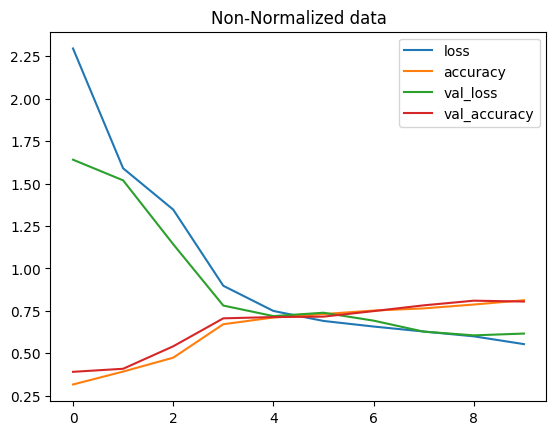

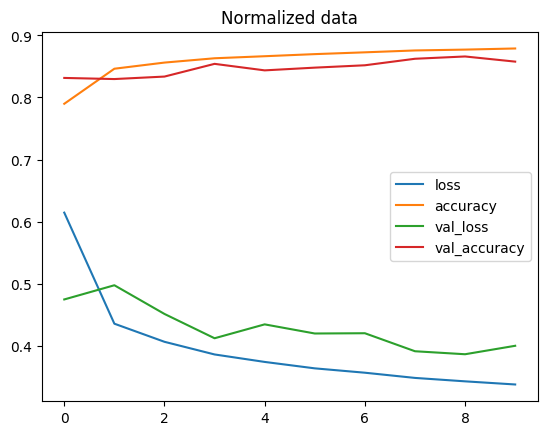

In [ ]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized data')

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

> 🔑**Note:** The same model with even *slightly* differ data can produce *dramatically* different results. So when you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).


### Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
lr_history = model_11.fit(train_data_norm, train_labels, epochs=40,
                       validation_data=(test_data_norm, test_labels),
                       callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6199 - accuracy: 0.7871 - val_loss: 0.4973 - val_accuracy: 0.8233 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4479 - accuracy: 0.8419 - val_loss: 0.5030 - val_accuracy: 0.8248 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4183 - accuracy: 0.8510 - val_loss: 0.4566 - val_accuracy: 0.8356 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3994 - accuracy: 0.8576 - val_loss: 0.4341 - val_accuracy: 0.8438 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3887 - accuracy: 0.8596 - val_loss: 0.4319 - val_accuracy: 0.8467 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3771 - accuracy: 0.8615 - val_loss: 0.4542 - val_accuracy: 0.8352 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

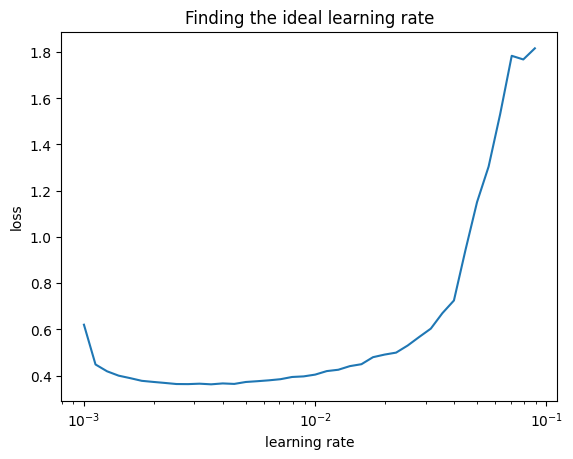

In [ ]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Finding the ideal learning rate')

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_12 = model_12.fit(train_data_norm, train_labels, epochs=40,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6462 - accuracy: 0.7742 - val_loss: 0.4885 - val_accuracy: 0.8286
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4440 - accuracy: 0.8429 - val_loss: 0.5204 - val_accuracy: 0.8220
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4138 - accuracy: 0.8530 - val_loss: 0.4500 - val_accuracy: 0.8369
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3936 - accuracy: 0.8596 - val_loss: 0.4495 - val_accuracy: 0.8414
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8632 - val_loss: 0.4318 - val_accuracy: 0.8457
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3684 - accuracy: 0.8665 - val_loss: 0.4579 - val_accuracy: 0.8366
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3589 - accuracy: 0.8704 - val_loss: 0.4245 - val_accuracy:

### Evaluating our multi-class classification model

To evaluate our multi-class classification model, we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

313/313 [==============================] - 1s 1ms/step


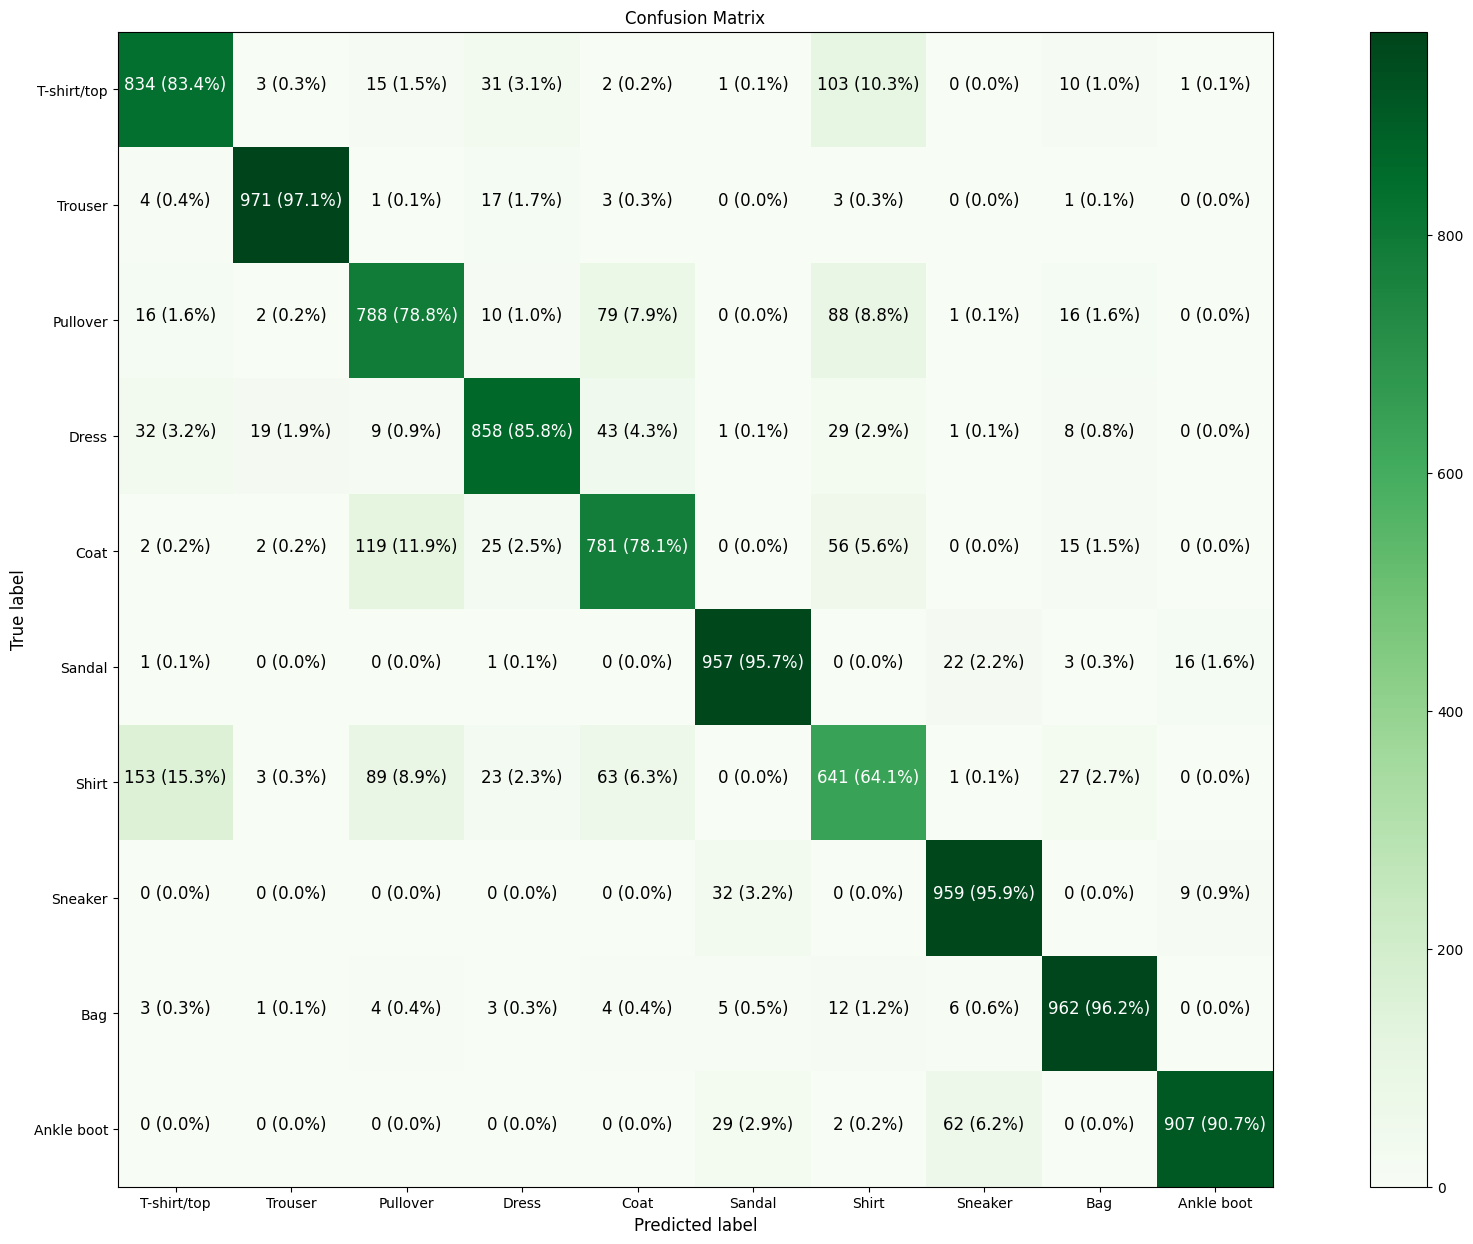

In [ ]:
# Make predictions with the best model
preds = model_12.predict(test_data_norm)
preds = np.argmax(preds, axis=1)

# Create a confusion_matrix
plot_confusion_matrix(test_labels, preds, class_names, figsize=(25, 15), text_size=12)

> 🔑**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

🔑**Note:** Often when working with images and other forms of visual data to develop a further understanding of the data and inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with truth label & the predicted label

In [ ]:
import random

def plot_random_images(model, images, true_labels, classes, n=5):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''

  # Plot the image
  plt.figure(figsize=(15, 10))
  for j in range(n):

    # Pick a random image
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]

    # Create predictions and targets
    pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0)
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.subplot(n // 5, 5, j+1)
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = 'green'
    else:
      color = 'red'

    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                     100*tf.reduce_max(pred_probs), true_label),
               color=color)

  # Adjust layout to prevent overlapping
  plt.tight_layout()
  plt.show()



  # # Create predictions and targets
  # target_image = images[i]
  # pred_probs = model.predict(target_image.reshape(1, 28, 28))
  # pred_label = classes[pred_probs.argmax()]
  # true_label = classes[true_labels[i]]

  # # Plot the image
  # plt.imshow(target_image, cmap=plt.cm.binary)

  # # Change the color of the titles depending on if the prediction is right or wrong
  # if pred_label == true_label:
  #   color = 'green'
  # else:
  #   color = 'red'

  # # Add xlabel information (prediction/true label)
  # plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
  #                                                  100*tf.reduce_max(pred_probs), true_label),
  #             color=color) # Set the color to green or red based on if the prediction is right or wrong


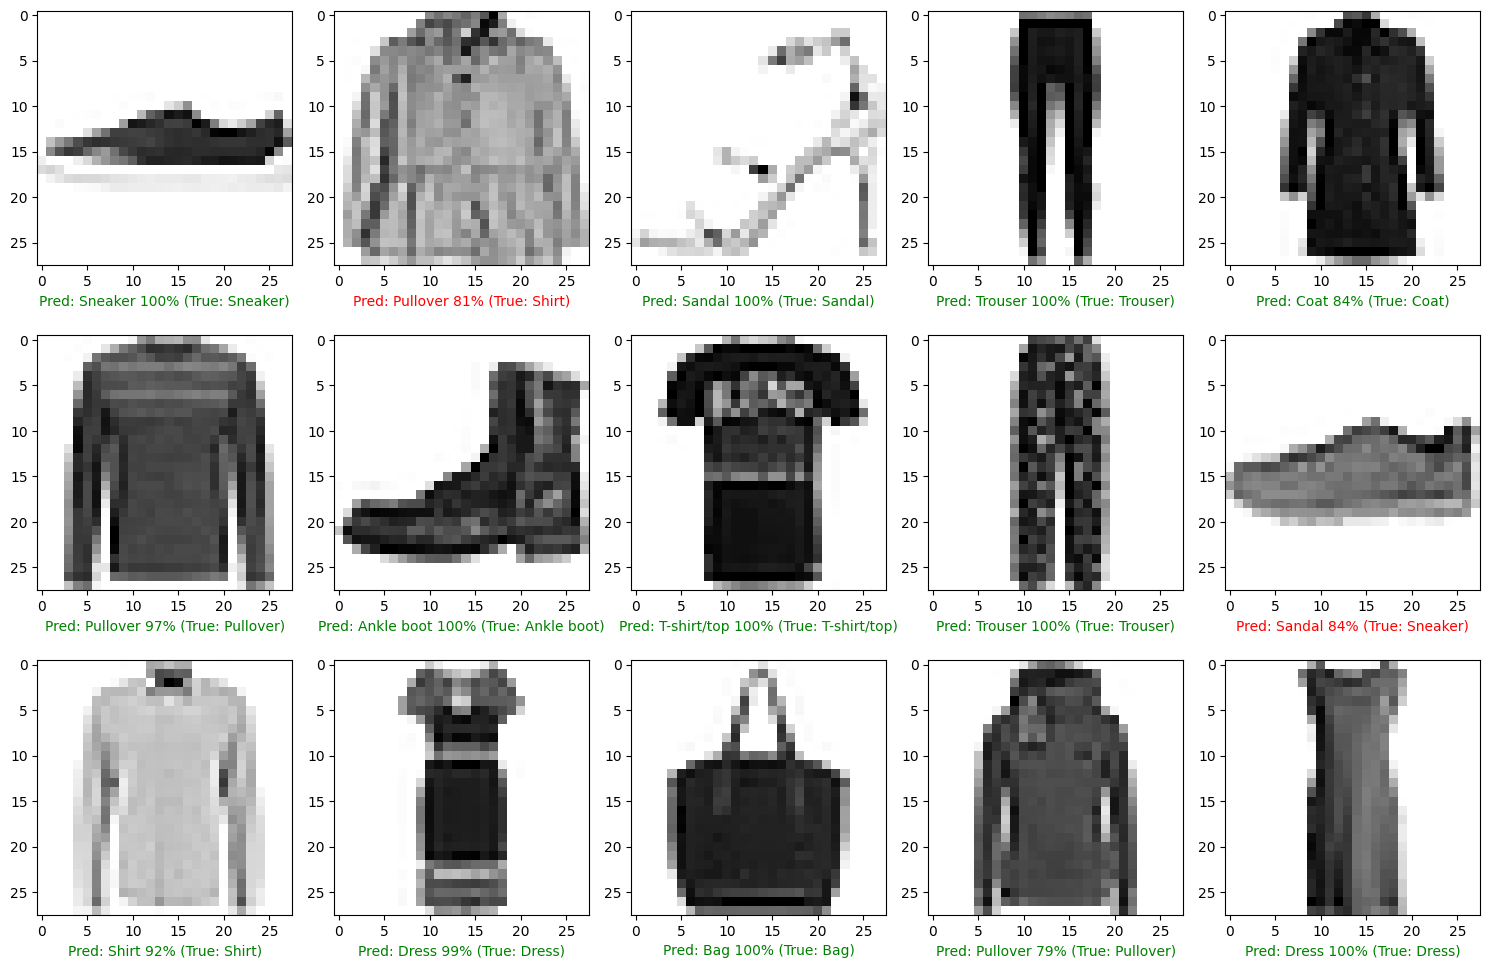

In [ ]:
# Check our a random image as well as it's prediction
plot_random_images(model_12, test_data_norm,
                  test_labels, class_names, n=15)

### What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_12.layers

In [ ]:
# Extract a particular layer
model_12.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_12.layers[1].get_weights()

# Weights and weights shapes
weights.shape, weights

((784, 16),
 array([[-0.4636643 , -0.21669634,  1.490506  , ..., -0.09754573,
          0.4395974 , -0.06704378],
        [ 0.07141919, -0.23760752, -0.07683138, ..., -0.97133684,
         -0.64401174,  0.7849352 ],
        [ 0.3714862 , -0.29318842,  1.5475671 , ..., -1.0700955 ,
         -0.8686516 ,  0.62378836],
        ...,
        [ 0.10532682, -0.10805788, -0.08674648, ...,  0.0861147 ,
          0.3538294 , -0.06078985],
        [ 0.9905406 ,  0.08130611,  0.3303824 , ...,  0.12744102,
          0.6086721 , -0.00786002],
        [ 0.81470823,  0.21641655,  1.1658436 , ...,  0.08322791,
         -0.41207287, -0.19270694]], dtype=float32))

In [ ]:
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 16)                12560     
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dense_32 (Dense)            (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Bias and Biases shapes
biases.shape, biases

((16,),
 array([ 0.1675936 , -0.12759984,  0.14049539, -0.39787778,  0.9143801 ,
        -0.1294247 , -0.02403541,  0.35227796,  0.12929995,  0.12429045,
         0.38944712,  0.99890673, -0.34828514,  1.2472358 ,  0.66742843,
         1.409426  ], dtype=float32))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

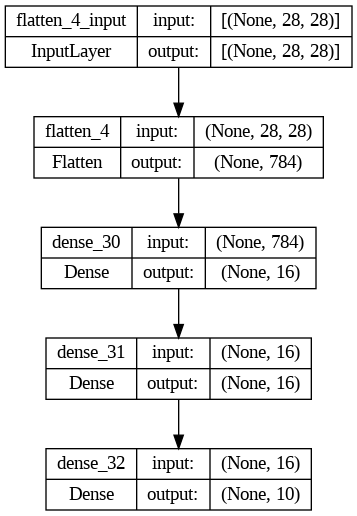

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_12, show_shapes=True, show_layer_names=True)

### Exercise 02

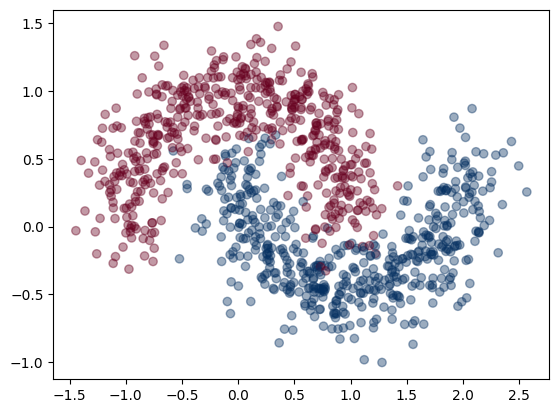

In [ ]:
# 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
# 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, alpha=0.4)

In [ ]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_test.mean()) / X_test.std()

# Set random seed
tf.random.set_seed(42)

# 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model using adam optimizer, binary crossentropy and accuracy metric
model_13.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_13.fit(X_train_norm, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 4ms/step - loss: 0.6890 - accuracy: 0.6662
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.8163
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.8263
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.8263
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5551 - accuracy: 0.8288
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.8313
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8250
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3861 - accuracy: 0.8325
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8363
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8450
Epoch 11/50
25/25 [

In [ ]:
# Evaluate our model
model_13.evaluate(X_test_norm, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9350


[0.18364451825618744, 0.9350000023841858]

In [ ]:
# 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
# Check model_12
# model_12.evaluate(test_data_norm, test_labels) # [0.4007844626903534, 0.8675000071525574]

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Let's add a callback to retrieve the best weights
# Create an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=30, batch_size=64,
                          callbacks=[early_stopping], validation_data=(test_data_norm, test_labels))

Epoch 1/30
938/938 [==============================] - 4s 3ms/step - loss: 0.5420 - accuracy: 0.8082 - val_loss: 0.4487 - val_accuracy: 0.8405
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3895 - accuracy: 0.8598 - val_loss: 0.4169 - val_accuracy: 0.8511
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3541 - accuracy: 0.8719 - val_loss: 0.3720 - val_accuracy: 0.8649
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3273 - accuracy: 0.8805 - val_loss: 0.3703 - val_accuracy: 0.8676
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3086 - accuracy: 0.8866 - val_loss: 0.3499 - val_accuracy: 0.8740
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2957 - accuracy: 0.8903 - val_loss: 0.3636 - val_accuracy: 0.8689
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2850 - accuracy: 0.8942 - val_loss: 0.3686 - val_accuracy: 0.8661
Epoch 

In [ ]:
model_14.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8884


[0.32930806279182434, 0.8884000182151794]

In [ ]:
# 5. Writing a softmax activation function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)

x = np.array([1, 2, 3])
softmax(x), np.sum(softmax(x))

(array([0.09003057, 0.24472847, 0.66524096]), 1.0)

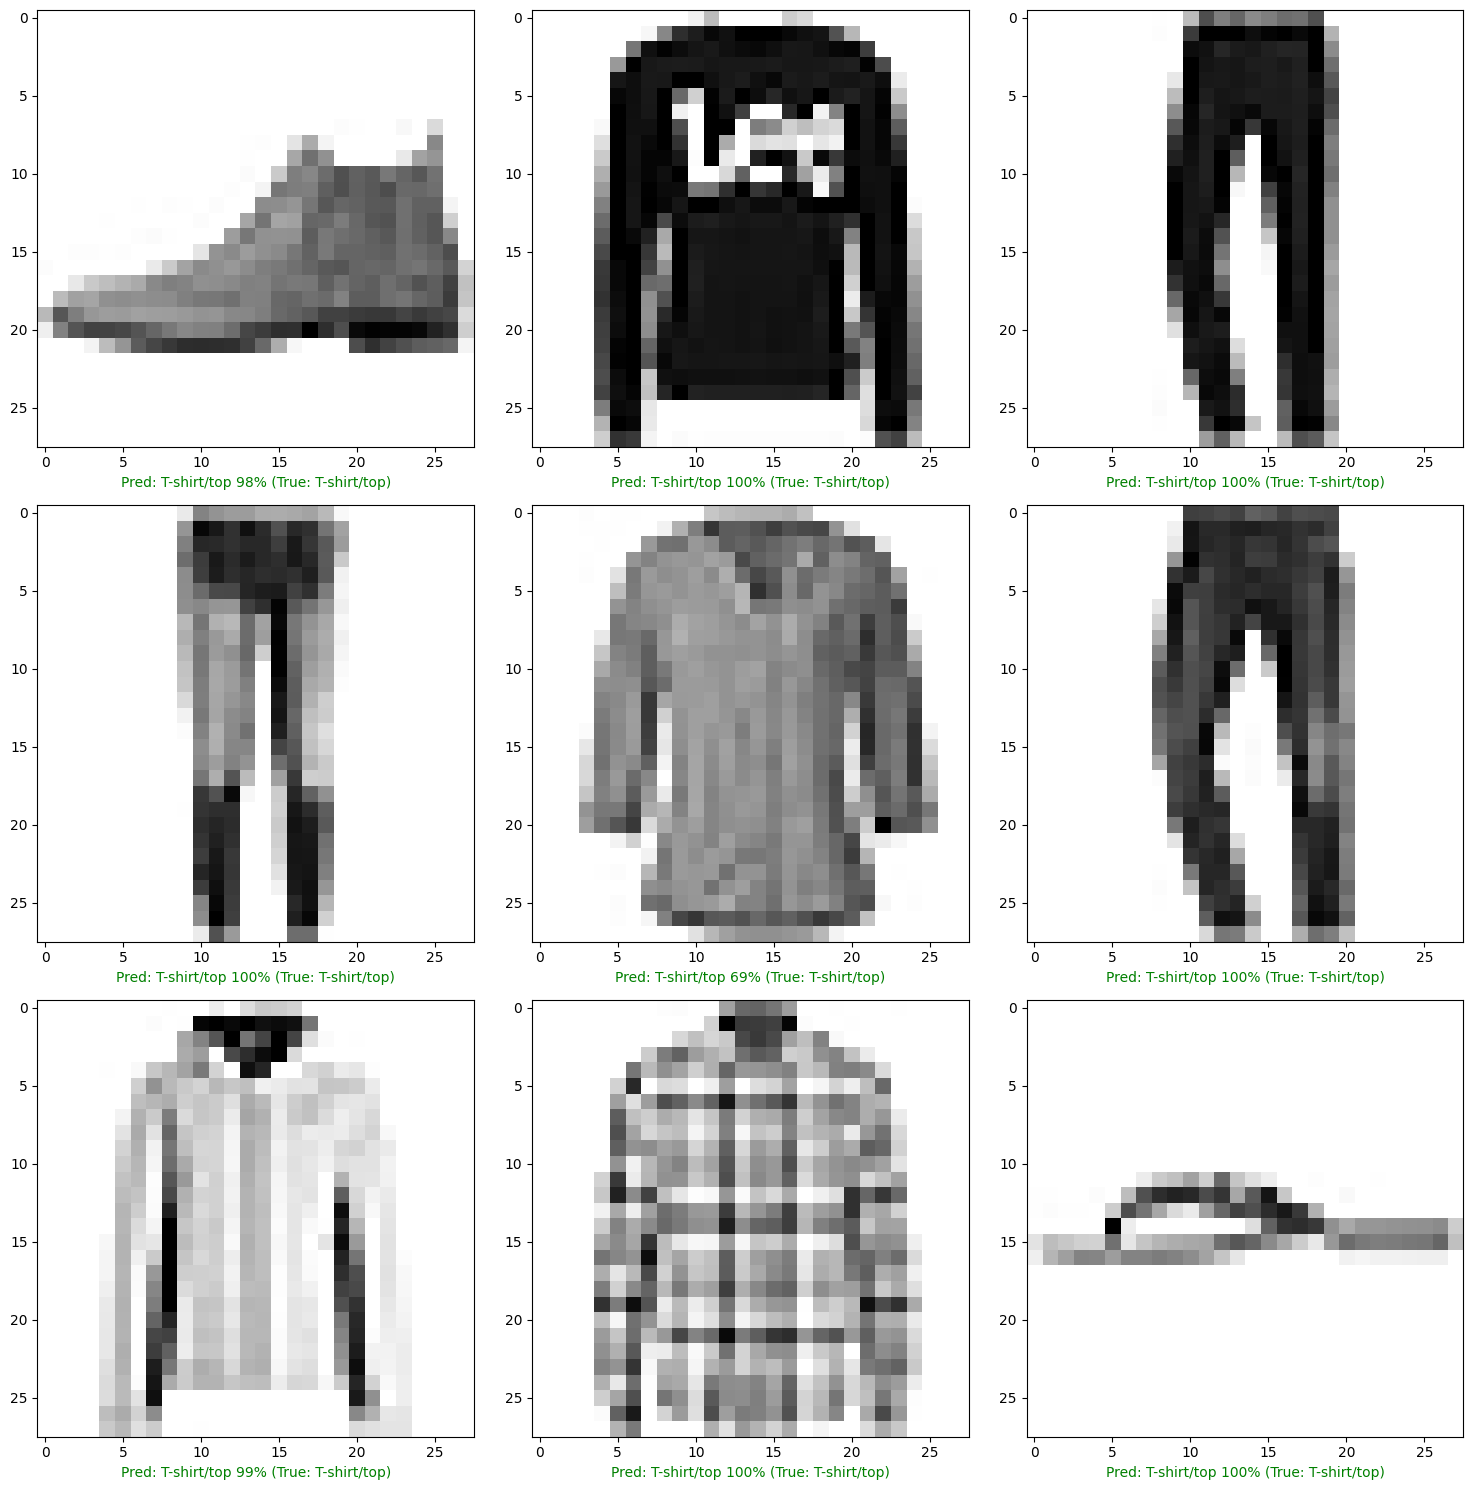

In [ ]:
# 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.
def plot_class_images(model, images, true_labels, n=3, classes=None, fashion_type=None):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''

  pred_probs = model.predict(images, verbose=0)
  predictions = np.argmax(pred_probs, axis=1)
  pred = [classes[value] for value in predictions]

  pred_labels = []
  ground_truth = []
  for i in range(len(true_labels)):

    if fashion_type == classes[true_labels[i]]:
      pred_labels.append(pred[i])
      ground_truth.append(classes[true_labels[i]])


  # Plot the image
  plt.figure(figsize=(15, 5 * (n // 3)))
  for i in range(len(pred_labels[:n])):

    # Plot the image
    plt.subplot(n // 3, 3, i+1)
    plt.imshow(images[i], cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_labels[i] == ground_truth[i]:
      color = 'green'
    else:
      color = 'red'

    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_labels[i],
                                                      100*tf.reduce_max(pred_probs[i]), ground_truth[i]),
              color=color)

  # Adjust layout to prevent overlapping
  plt.tight_layout()
  plt.subplots_adjust()  # Adjust spacing
  plt.show()

plot_class_images(model_14, test_data_norm, test_labels, n=9, classes=class_names, fashion_type='T-shirt/top')

In [ ]:
predictions = np.argmax(model_14.predict(test_data_norm), axis=1)
elements_equal_to_1 = [class_names[value] for value in predictions if value == 0]
elements_equal_to_1[:5]

313/313 [==============================] - 0s 1ms/step


['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top']

In [ ]:
predictions, test_labels

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))